In [2]:
import pandas as pd

In [4]:
basketball_data = pd.read_csv(r'C:\Users\Jake\Documents\GitHub\FunAnalyticalStuff\hs_wbb_model\Basketball_Final_Stats.csv')
basketball_data

,Team,Game_ID,Points_Scored,Points_Allowed,Win,Field Goals Made,Field Goals Attempted,Free Throws Made,Free Throws Attempted,Three Point Made,...,Offensive_Efficiency_Allowed,Efficient Points Score_Allowed,Raw EOP_Allowed,Two Points Per Attempt_Allowed,Three Points Per Attempt_Allowed,Total Points Per Attempt_Allowed,Scoring_Possesions_Allowed,Team Play Percent_Allowed,Possesions_Allowed,Offensive_Efficieny_Difference
0,Laconia,33023432,72,33,1,28,71,9,15,7,...,0.301587,21.714286,18.336508,0.476190,0.750000,0.594595,11.304762,0.167726,69.52,0.051354
1,Campbellsport,33023432,33,72,0,9,37,11,21,4,...,0.352941,11.647059,14.484706,0.976744,0.750000,0.887324,30.160000,0.354824,91.35,-0.051354
2,Laconia,33023434,87,41,1,33,59,9,15,12,...,0.205882,17.911765,14.708235,0.823529,0.857143,0.829268,17.400000,0.227154,76.70,0.131618
3,Lomira,33023434,41,87,0,16,41,7,14,2,...,0.337500,13.837500,15.133500,1.200000,1.500000,1.322034,35.160000,0.475135,85.18,-0.131618
4,Laconia,33023435,58,16,1,23,69,5,7,7,...,0.089552,5.194030,4.219701,0.307692,0.857143,0.424242,6.320000,0.090286,75.85,0.134132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2067,Appleton East,33027533,105,96,1,34,49,27,39,7,...,0.513514,53.918919,45.271351,1.230769,1.000000,1.150000,39.576471,0.457003,86.30,0.118839
2068,Kimberly,33027534,82,78,1,32,56,10,15,8,...,0.308642,25.308642,23.222222,1.096774,1.500000,1.272727,32.200000,0.445983,85.65,-0.004294
2069,Appleton East,33027534,78,82,0,29,55,8,8,12,...,0.304348,23.739130,20.586087,1.200000,1.500000,1.285714,34.666667,0.509804,80.12,0.004294
2070,Marshfield,33027535,55,69,0,18,49,10,13,9,...,0.391304,21.521739,22.304348,1.280000,1.200000,1.240000,27.633333,0.440021,68.37,-0.123447


In [5]:
basketball_data.columns

Index(['Team', 'Game_ID', 'Points_Scored', 'Points_Allowed', 'Win',
       'Field Goals Made', 'Field Goals Attempted', 'Free Throws Made',
       'Free Throws Attempted', 'Three Point Made', 'Three Point Attempted',
       'Total Points', 'Offensive Rebounds', 'Defensive Rebounds',
       'Total Rebounds', 'Assists', 'Turnovers', 'Steals', 'Blocks', 'Fouls',
       'Technical Fouls', 'Offensive_Efficiency', 'Efficient Points Score',
       'Raw EOP', 'Two Points Per Attempt', 'Three Points Per Attempt',
       'Total Points Per Attempt', 'Scoring_Possesions', 'Team Play Percent',
       'Possesions', 'Field Goals Made_Allowed',
       'Field Goals Attempted_Allowed', 'Free Throws Made_Allowed',
       'Free Throws Attempted_Allowed', 'Three Point Made_Allowed',
       'Three Point Attempted_Allowed', 'Total Points_Allowed',
       'Offensive Rebounds_Allowed', 'Defensive Rebounds_Allowed',
       'Total Rebounds_Allowed', 'Assists_Allowed', 'Turnovers_Allowed',
       'Steals_Allowed'

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
def get_vif(df):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = df.columns
    vif_data['VIF'] = [vif(df.values, i) for i in range(len(df.columns))]
    return vif_data

ModuleNotFoundError: No module named 'statsmodels'

In [110]:
basketball_data_drop_extra = basketball_data.drop(columns = ['Team', 'Game_ID', 'Points_Scored', 'Total Points_Allowed', 'Total Points', 'Points_Allowed', 'Efficient Points Score', 'Raw EOP', 'Efficient Points Score_Allowed', 'Raw EOP_Allowed', 'Offensive_Efficieny_Difference', 'Fouls', 'Technical Fouls', 'Fouls_Allowed',
       'Technical Fouls_Allowed', 'Blocks', 'Blocks_Allowed', 'Steals', 'Steals_Allowed'])


In [111]:
from sklearn.model_selection import train_test_split

y = basketball_data_drop_extra['Win']
X = basketball_data_drop_extra.drop(columns = ['Win'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 13)

In [81]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.model_selection import cross_val_score

log = LogisticRegression()
rid = RidgeClassifier()
cv = cross_val_score(rid, X, y, cv = 5)
cv

array([0.97590361, 0.94216867, 0.9468599 , 0.96135266, 0.96135266])

In [133]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver = 'lbfgs', alpha = 1e-5, hidden_layer_sizes = (5, 2), random_state = 13)
clf_fit = clf.fit(X_train, y_train)

C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [64]:
X_train.columns

Index(['Field Goals Made', 'Field Goals Attempted', 'Free Throws Made',
       'Free Throws Attempted', 'Three Point Made', 'Three Point Attempted',
       'Offensive Rebounds', 'Defensive Rebounds', 'Total Rebounds', 'Assists',
       'Turnovers', 'Steals', 'Offensive_Efficiency', 'Two Points Per Attempt',
       'Three Points Per Attempt', 'Total Points Per Attempt',
       'Scoring_Possesions', 'Team Play Percent', 'Possesions',
       'Field Goals Made_Allowed', 'Field Goals Attempted_Allowed',
       'Free Throws Made_Allowed', 'Free Throws Attempted_Allowed',
       'Three Point Made_Allowed', 'Three Point Attempted_Allowed',
       'Offensive Rebounds_Allowed', 'Defensive Rebounds_Allowed',
       'Total Rebounds_Allowed', 'Assists_Allowed', 'Turnovers_Allowed',
       'Steals_Allowed', 'Offensive_Efficiency_Allowed',
       'Two Points Per Attempt_Allowed', 'Three Points Per Attempt_Allowed',
       'Total Points Per Attempt_Allowed', 'Scoring_Possesions_Allowed',
       'Team 

In [136]:
from sklearn.metrics import accuracy_score
y_pred = clf_fit.predict(X_test)
accuracy_score(y_true = y_test, y_pred = y_pred)

0.9686746987951808

In [114]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_fit = scaler.fit(X_train)
X_train_scaled = scaler_fit.transform(X_train)
X_test_scaled = scaler_fit.transform(X_test)


In [116]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay as cmd, confusion_matrix as cm
knn_fit = KNeighborsClassifier(n_neighbors = 10).fit(X_train_scaled, y_train)
knn_predict = knn_fit.predict(X_test_scaled)
accuracy_score(y_true = y_test, y_pred = knn_predict)

0.9325301204819277

In [10]:
import matplotlib.pyplot as plt

def cf_matrix(y_test, predict, fit):
    c_m = cm(y_test, predict, labels = fit.classes_)
    disp = cmd(c_m, display_labels = fit.classes_)
    disp.plot()
    plt.show()

In [132]:
cf_matrix(y_test, clf_fit, y_pred)

AttributeError: 'numpy.ndarray' object has no attribute 'classes_'

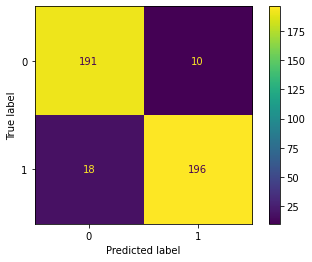

In [117]:
cf_matrix(y_test, knn_predict, knn_fit)

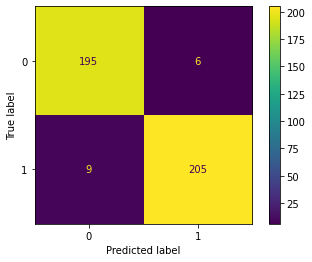

In [119]:
cf_matrix(y_test, clf_scaled_pred, clf_scaled)

In [118]:
clf_scaled = clf.fit(X_train_scaled, y_train)
clf_scaled_pred = clf_scaled.predict(X_test_scaled)
accuracy_score(y_true = y_test, y_pred = clf_scaled_pred)

0.963855421686747

In [82]:
this_list = [1, 2, 3, 4, 5]
for x in this_list[:-1]:
    print(x)

1
2
3
4


In [88]:
X_scaled = scaler.transform(X)

In [106]:

this_test_2 = [[ 0.9974421,   2.32246606 , 1.4762132,   0.19057405 , 3.21750988 , 0.50345946,
  -0.69562826,  0.17339849, -0.41161427 , 0.34444616, -1.33785577 ,-0.28183073,
   0.07776896, -1.05157324,  3.02028384, -0.15590656,  1.50649744,  0.5520179,
   2.33370173 , 0.98071516,  0.06445085,  2.32430757,  1.96108027 , 0.51499865,
   0.08481871, -0.33120744,  2.99459247,  2.05092816, -1.00765847,  0.21977046,
  -0.46351212 , 0.79795379,  0.57921955 , 0.61353988 , 1.21413186,  1.39576281,
   1.05381833,  0.29443547]]
knn_fit.predict_proba(this_test_2)

array([[0.7, 0.3]])

In [93]:
clf_scaled.classes_

array([0, 1], dtype=int64)

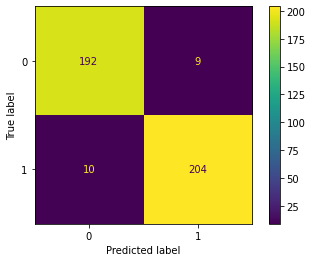

In [85]:
cf_matrix(y_test, clf_scaled_pred, clf_scaled)

In [82]:
from sklearn.metrics import accuracy_score
rid_fit = RidgeClassifier().fit(X_train, y_train)
rid_predict = rid_fit.predict(X_test)
accuracy_score(y_true = y_test, y_pred = rid_predict)

0.963855421686747

In [83]:
rid_coefs = rid_fit.coef_.tolist()
col = X.columns.tolist()
this_dict = {}
for coef, feat in zip(rid_fit.coef_[0,:], col):
    this_dict[feat] = coef


pandas_frame = pd.DataFrame.from_dict(this_dict, orient = 'index')
pandas_frame

,0
Field Goals Made,0.035916
Field Goals Attempted,-0.004049
Free Throws Made,0.015912
Free Throws Attempted,0.002183
Three Point Made,0.054193
Three Point Attempted,-0.010696
Offensive Rebounds,-0.007908
Defensive Rebounds,0.005617
Total Rebounds,0.004529
Assists,-0.006041
